<a href="https://colab.research.google.com/github/sightes/RNA-UBO-2023/blob/main/RedesNeuronales_2023_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
import keras
from keras import layers

(x_train, y_train), (x_test, y_test) = mnist.load_data()

###
x_train=x_train[y_train==0]
x_test_1=x_test[y_test==1][0:9]
x_test_0=x_test[y_test==0][0]
x_test=np.asarray(x_test_1.tolist()+[x_test_0.tolist()])
####
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Añadir ruido Gausiano centrado en 0.5 y con std=0.5 a las imágenes originales
#noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
#x_train = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.1, size= x_test.shape)
x_test  =  x_test  + noise

print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(5923, 784)
(10, 784)


In [ ]:

encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
24/24 [==============================] - 2s 22ms/step - loss: 0.5781 - val_loss: 1.6733
Epoch 2/20
24/24 [==============================] - 0s 12ms/step - loss: 0.2930 - val_loss: 3.5267
Epoch 3/20
24/24 [==============================] - 0s 12ms/step - loss: 0.2477 - val_loss: 3.7029
Epoch 4/20
24/24 [==============================] - 0s 11ms/step - loss: 0.2261 - val_loss: 3.7106
Epoch 5/20
24/24 [==============================] - 0s 11ms/step - loss: 0.2095 - val_loss: 3.6895
Epoch 6/20
24/24 [==============================] - 0s 12ms/step - loss: 0.1999 - val_loss: 3.5688
Epoch 7/20
24/24 [==============================] - 0s 11ms/step - loss: 0.1934 - val_loss: 3.4030
Epoch 8/20
24/24 [==============================] - 0s 12ms/step - loss: 0.1875 - val_loss: 3.2291
Epoch 9/20
24/24 [==============================] - 0s 15ms/step - loss: 0.1820 - val_loss: 3.1007
Epoch 10/20
24/24 [==============================] - 0s 18ms/step - loss: 0.1771 - val_loss: 2.9938
Epoch 11/

1/1 [==============================] - 0s 46ms/step


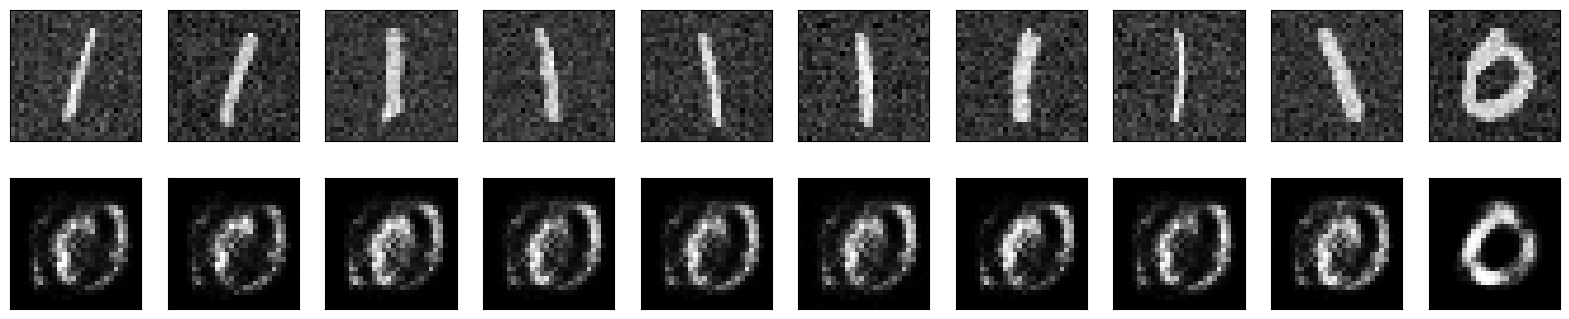

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
https://www.codificandobits.com/blog/autoencoders-explicacion-y-tutorial-python/

https://unipython.com/reduccion-de-ruido-en-imagenes-utilizando-autocodificadores/